# RNN

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class time_series_data():
    def __init__(self,num_points,xmin,xmax):
        self.xmin=xmin
        self.xmax=xmax
        self.num_points=num_points
        self.resolution=(xmax-xmin)/num_points
        self.x_data=np.linspace(xmin,xmax,num_points)
        self.y_true=np.sin(self.x_data)
    
    def ret_true(self,x_series):
        return np.sin(x_series)
    
    def next_batch(self,batch_size,steps,return_ts=False):
        rand_start = np.random.rand(batch_size,1)
        ts_start = rand_start * (self.xmax - self.xmin - self.resolution*steps)
        batch_ts = ts_start + np.arange(0.0,steps+1)*self.resolution
        y_batch = np.sin(batch_ts)
        if return_ts:
            return y_batch[:,:-1].reshape(-1,steps,1) , y_batch[:,1:].reshape(-1,steps,1) , batch_ts
        else :
            return y_batch[:,:-1].reshape(-1,steps,1) , y_batch[:,1:].reshape(-1,steps,1)

In [3]:
ts_data = time_series_data(250,0,10)

## MODEL

In [4]:
tf.reset_default_graph()

In [5]:
neurons = 100
inputs = 1
outputs = 1
learning_rate = 0.001
training_iterations = 5000
num_time_steps = 30
batch_size = 10

In [6]:
X = tf.placeholder(tf.float32,[None,num_time_steps,inputs])
Y = tf.placeholder(tf.float32,[None ,num_time_steps, outputs])

In [7]:
layer = tf.contrib.rnn.BasicLSTMCell(neurons,activation=tf.nn.relu)
cell_layer = tf.contrib.rnn.OutputProjectionWrapper(layer,output_size=1)

In [8]:
output,states = tf.nn.dynamic_rnn(cell_layer,X,dtype=tf.float32)

In [9]:
mse = tf.reduce_mean(tf.square(output-Y))

In [10]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(mse)

In [11]:
init = tf.global_variables_initializer()

In [12]:
saver = tf.train.Saver()

## TRAINING

In [13]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(training_iterations):
        batch_x,batch_y = ts_data.next_batch(batch_size,num_time_steps)
        sess.run(train,feed_dict={X:batch_x,Y:batch_y})
        if i%100==0:
            loss = mse.eval(feed_dict={X:batch_x,Y:batch_y})
            print('At {} loss {}'.format(i,loss))
    saver.save(sess,'./rnn_time_series_sin')

At 0 loss 0.6024690866470337
At 100 loss 0.023857872933149338
At 200 loss 0.013875223696231842
At 300 loss 0.008808682672679424
At 400 loss 0.007920158095657825
At 500 loss 0.0036199952010065317
At 600 loss 0.0018344088457524776
At 700 loss 0.0007596572977490723
At 800 loss 0.00046953579294495285
At 900 loss 0.0001488620473537594
At 1000 loss 0.00015700169024057686
At 1100 loss 0.00013137426867615432
At 1200 loss 0.00015933782560750842
At 1300 loss 0.0001049526545102708
At 1400 loss 9.70733817666769e-05
At 1500 loss 7.772676326567307e-05
At 1600 loss 0.00012899925059173256
At 1700 loss 0.00013784406473860145
At 1800 loss 9.971217514248565e-05
At 1900 loss 9.309197776019573e-05
At 2000 loss 3.8492376916110516e-05
At 2100 loss 0.00010341285087633878
At 2200 loss 0.00018282263772562146
At 2300 loss 6.414378731278703e-05
At 2400 loss 8.60155705595389e-05
At 2500 loss 8.433884067926556e-05
At 2600 loss 9.529497765470296e-05
At 2700 loss 6.052430035197176e-05
At 2800 loss 5.7235200074501336e

## TESTING

In [14]:
with tf.Session() as sess:
    saver.restore(sess,'./rnn_time_series_sin')
    x_=np.linspace(0,3,num_time_steps + 1)
    x_ls=x_[:-1].reshape(1,-1,1)
    x_rs=x_[1:].reshape(1,-1,1)
    y_p = np.sin(x_ls)
    #y_t = np.sin(x_rs)
    y_pred = sess.run(output,feed_dict={X:y_p})

INFO:tensorflow:Restoring parameters from ./rnn_time_series_sin


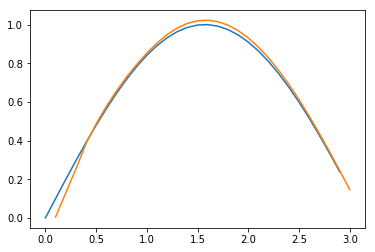

In [15]:
plt.plot(x_ls.flatten(),y_p.flatten())
plt.plot(x_rs.flatten(),y_pred.flatten())
#plt.plot(ts.flatten()[1:],y1.flatten(),'*')